In [ ]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/NER/sports 1.csv", encoding="latin1")

data.head(26)

,Sentence Number,Word,Tag
0,1.0,On,O
1,1.0,March,B-STI
2,1.0,12,M-STI
3,1.0,2024,E-STI
4,1.0,at,O
5,1.0,Old,B-SLO
6,1.0,Trafford,M-SLO
7,1.0,in,O
8,1.0,Manchester,E-SLO
9,1.0,Marcus,B-SP


In [ ]:
print("Unique words in corpus:", data['Word'].nunique())
print("Unique tags in corpus:", data['Tag'].nunique())

Unique words in corpus: 923
Unique tags in corpus: 10


In [ ]:
words = list(set(data["Word"].values))
words

['min',
 'outstanding',
 'Mohammad',
 'Ashes',
 'MCG',
 '19',
 'India',
 '72',
 'innings',
 'build',
 'Kusal',
 'steady',
 'sweep',
 'Premadasa',
 '17',
 'League',
 'burst',
 'McLean',
 'pace',
 'Basin',
 'Latham',
 'Jr',
 '13',
 'Pakistan',
 '94',
 'convincing',
 'haul',
 'their',
 'boundary',
 'captain',
 'Grealish',
 'blow',
 'leading',
 'Siro',
 'friendly',
 'Town',
 '99',
 'Trent',
 '102',
 '9',
 'brisk',
 'Milan',
 'A',
 'middle',
 'dance',
 'Modric',
 '45',
 'Raheem',
 'masterclass',
 'Valencia',
 'Gandhi',
 'Dhaka',
 'Brisbane',
 'course',
 'patiently',
 'contribute',
 'in',
 'Steve',
 'wickets',
 '28',
 'assist',
 'explosive',
 'bowling',
 'Mahrez',
 'Shaheen',
 'flair',
 'Bruno',
 '89th',
 'Samson',
 'firm',
 'fan',
 'defeated',
 '12',
 'Colombo',
 'whirlwind',
 'Saint',
 'team',
 'Stretford',
 'December',
 'decisive',
 'Zealand',
 'Port',
 'bag',
 'Chennai',
 '98',
 'ley',
 'a',
 'dominant',
 'quickfire',
 'Paris',
 'unstoppable',
 'as',
 'rescue',
 'Ahli',
 'Liga',
 'Joa',


In [ ]:
data['Tag'].unique()

array(['O', 'B-STI', 'M-STI', 'E-STI', 'B-SLO', 'M-SLO', 'E-SLO', 'B-SP',
       'E-SP', 'S-STY', nan], dtype=object)

In [ ]:
words = list(set(data["Word"].values))
words.append("ENDPAD")
num_words = len(words)
num_words

924

In [ ]:
tags = data['Tag'].unique().tolist()
num_tags = len(tags)

In [ ]:
class SentenceGetter(object):
    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, t) for w, t in zip(s["Word"].values.tolist(),
                                                           s['Tag'].values.tolist())]
        self.grouped = self.data.groupby("Sentence Number").apply(agg_func)
        self.sentences = [s for s in self.grouped]

    def get_next(self):
        try:
            s = self.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None

In [ ]:
getter = SentenceGetter(data)
sentences = getter.sentences

/tmp/ipython-input-831964493.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  self.grouped = self.data.groupby("Sentence Number").apply(agg_func)


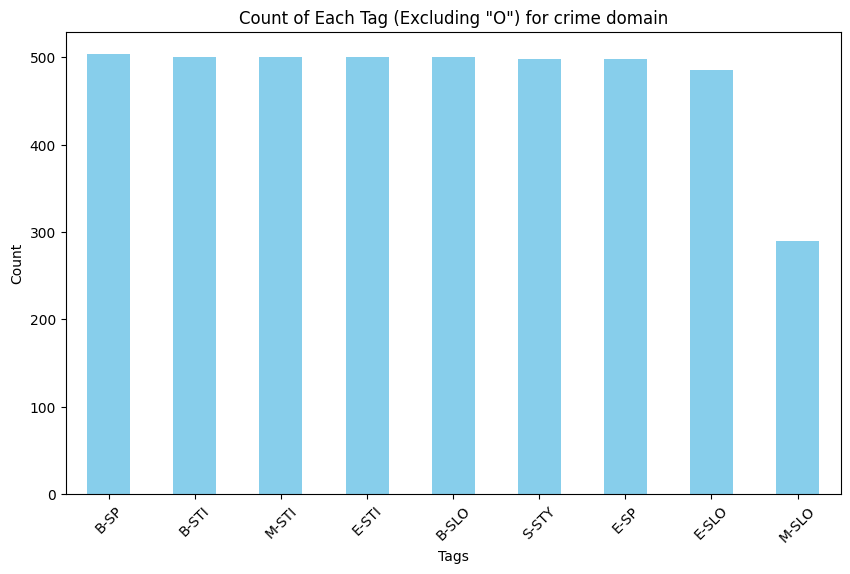

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
tag_to_ignore = 'O'
#Filter out the specific tag
filtered_df = data[data['Tag'] != tag_to_ignore]
# Count the occurrences of each tag
tag_counts = filtered_df['Tag'].value_counts()
# Create the bar chart
plt.figure(figsize=(10, 6))
tag_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Each Tag (Excluding "{}") for crime domain'.format(tag_to_ignore))
plt.xlabel('Tags')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
sentences[0]

[('On', 'O'),
 ('March', 'B-STI'),
 ('12', 'M-STI'),
 ('2024', 'E-STI'),
 ('at', 'O'),
 ('Old', 'B-SLO'),
 ('Trafford', 'M-SLO'),
 ('in', 'O'),
 ('Manchester', 'E-SLO'),
 ('Marcus', 'B-SP'),
 ('Rashford', 'E-SP'),
 ('scored', 'O'),
 ('the', 'O'),
 ('winning', 'O'),
 ('goal', 'O'),
 ('as', 'O'),
 ('Manchester', 'O'),
 ('United', 'O'),
 ('secured', 'O'),
 ('a', 'O'),
 ('crucial', 'O'),
 ('football', 'S-STY'),
 ('victory', 'O'),
 ('against', 'O'),
 ('Liverpool', 'O')]

In [ ]:
word2idx = {w: i + 1 for i, w in enumerate(words)}
tag2idx = {t: i for i, t in enumerate(tags)}

In [ ]:
word2idx

{'min': 1,
 'outstanding': 2,
 'Mohammad': 3,
 'Ashes': 4,
 'MCG': 5,
 '19': 6,
 'India': 7,
 '72': 8,
 'innings': 9,
 'build': 10,
 'Kusal': 11,
 'steady': 12,
 'sweep': 13,
 'Premadasa': 14,
 '17': 15,
 'League': 16,
 'burst': 17,
 'McLean': 18,
 'pace': 19,
 'Basin': 20,
 'Latham': 21,
 'Jr': 22,
 '13': 23,
 'Pakistan': 24,
 '94': 25,
 'convincing': 26,
 'haul': 27,
 'their': 28,
 'boundary': 29,
 'captain': 30,
 'Grealish': 31,
 'blow': 32,
 'leading': 33,
 'Siro': 34,
 'friendly': 35,
 'Town': 36,
 '99': 37,
 'Trent': 38,
 '102': 39,
 '9': 40,
 'brisk': 41,
 'Milan': 42,
 'A': 43,
 'middle': 44,
 'dance': 45,
 'Modric': 46,
 '45': 47,
 'Raheem': 48,
 'masterclass': 49,
 'Valencia': 50,
 'Gandhi': 51,
 'Dhaka': 52,
 'Brisbane': 53,
 'course': 54,
 'patiently': 55,
 'contribute': 56,
 'in': 57,
 'Steve': 58,
 'wickets': 59,
 '28': 60,
 'assist': 61,
 'explosive': 62,
 'bowling': 63,
 'Mahrez': 64,
 'Shaheen': 65,
 'flair': 66,
 'Bruno': 67,
 '89th': 68,
 'Samson': 69,
 'firm': 70,
 

In [ ]:
tag2idx

{'O': 0,
 'B-STI': 1,
 'M-STI': 2,
 'E-STI': 3,
 'B-SLO': 4,
 'M-SLO': 5,
 'E-SLO': 6,
 'B-SP': 7,
 'E-SP': 8,
 'S-STY': 9,
 nan: 10}

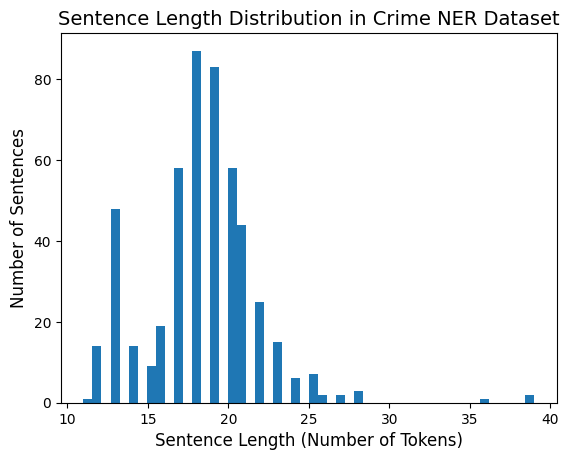

In [ ]:
plt.hist([len(s) for s in sentences], bins=50)
# Add title and axis labels
plt.title("Sentence Length Distribution in Crime NER Dataset", fontsize=14)
plt.xlabel("Sentence Length (Number of Tokens)", fontsize=12)
plt.ylabel("Number of Sentences", fontsize=12)
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 40

X = [[word2idx[w[0]] for w in s] for s in sentences]
X = pad_sequences(maxlen=max_len, sequences=X, padding="post", value=num_words-1)

y = [[tag2idx[w[1]] for w in s] for s in sentences]
y = pad_sequences(maxlen=max_len, sequences=y, padding="post", value=tag2idx["O"])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
!pip install tensorflow==2.15 tensorflow-addons==0.23.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 54.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 42.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 49.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 80.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.4/77.4 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.3
    Uninstalling wrapt-1.17.3:
      Successfully uninstalled wrapt-1.17.3
  Attempting uninstall: typeguard
    Found existing insta

In [ ]:
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, TimeDistributed, Dense, SpatialDropout1D

from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
tfa.text.crf_log_likelihood

<function tensorflow_addons.text.crf.crf_log_likelihood(inputs: Union[List[Union[float, int, numpy.float16, numpy.float32, numpy.float64, numpy.int8, numpy.int16, numpy.int32, numpy.int64, numpy.uint8, numpy.uint16, numpy.uint32, numpy.uint64, list]], tuple, float, int, numpy.float16, numpy.float32, numpy.float64, numpy.int8, numpy.int16, numpy.int32, numpy.int64, numpy.uint8, numpy.uint16, numpy.uint32, numpy.uint64, numpy.ndarray, tensorflow.python.framework.tensor.Tensor, tensorflow.python.framework.sparse_tensor.SparseTensor, tensorflow.python.ops.variables.Variable, keras.src.engine.keras_tensor.KerasTensor], tag_indices: Union[List[Union[float, int, numpy.float16, numpy.float32, numpy.float64, numpy.int8, numpy.int16, numpy.int32, numpy.int64, numpy.uint8, numpy.uint16, numpy.uint32, numpy.uint64, list]], tuple, float, int, numpy.float16, numpy.float32, numpy.float64, numpy.int8, numpy.int16, numpy.int32, numpy.int64, numpy.uint8, numpy.uint16, numpy.uint32, numpy.uint64, numpy.ndarray, tensorflow.python.framework.tensor.Tensor, tensorflow.python.framework.sparse_tensor.SparseTensor, tensorflow.python.ops.variables.Variable, keras.src.engine.keras_tensor.KerasTensor], sequence_lengths: Union[List[Union[float, int, numpy.float16, numpy.float32, numpy.float64, numpy.int8, numpy.int16, numpy.int32, numpy.int64, numpy.uint8, numpy.uint16, numpy.uint32, numpy.uint64, list]], tuple, float, int, numpy.float16, numpy.float32, numpy.float64, numpy.int8, numpy.int16, numpy.int32, numpy.int64, numpy.uint8, numpy.uint16, numpy.uint32, numpy.uint64, numpy.ndarray, tensorflow.python.framework.tensor.Tensor, tensorflow.python.framework.sparse_tensor.SparseTensor, tensorflow.python.ops.variables.Variable, keras.src.engine.keras_tensor.KerasTensor], transition_params: Union[List[Union[float, int, numpy.float16, numpy.float32, numpy.float64, numpy.int8, numpy.int16, numpy.int32, numpy.int64, numpy.uint8, numpy.uint16, numpy.uint32, numpy.uint64, list]], tuple, float, int, numpy.float16, numpy.float32, numpy.float64, numpy.int8, numpy.int16, numpy.int32, numpy.int64, numpy.uint8, numpy.uint16, numpy.uint32, numpy.uint64, numpy.ndarray, tensorflow.python.framework.tensor.Tensor, tensorflow.python.framework.sparse_tensor.SparseTensor, tensorflow.python.ops.variables.Variable, keras.src.engine.keras_tensor.KerasTensor, NoneType] = None) -> Tuple[tensorflow.python.framework.tensor.Tensor, tensorflow.python.framework.tensor.Tensor]>

In [ ]:
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [ ]:
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, TimeDistributed, Dense, SpatialDropout1D

from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 40

X = [[word2idx[w[0]] for w in s] for s in sentences]
X = pad_sequences(maxlen=max_len, sequences=X, padding="post", value=num_words-1)

y = [[tag2idx[w[1]] for w in s] for s in sentences]
y = pad_sequences(maxlen=max_len, sequences=y, padding="post", value=tag2idx["O"])

input_word = Input(shape=(max_len,), dtype=tf.int32)

x = Embedding(num_words, 64)(input_word)
x = SpatialDropout1D(0.1)(x)
x = Bidirectional(LSTM(64, return_sequences=True))(x)
logits = TimeDistributed(Dense(num_tags))(x)  # CRF potentials

model = Model(input_word, logits)
transition_params = tf.Variable(tf.random.uniform(shape=(num_tags, num_tags)))

# Define custom loss for CRF
def crf_loss(y_true, y_pred):
    sequence_lengths = tf.reduce_sum(tf.cast(tf.not_equal(y_true, 0), dtype=tf.int32), axis=1)  # assuming 0 is padding
    log_likelihood, _ = tfa.text.crf_log_likelihood(
        inputs=y_pred,
        tag_indices=tf.cast(y_true, tf.int32),
        sequence_lengths=sequence_lengths,
        transition_params=transition_params   # reuse existing variable here
    )
    return -tf.reduce_mean(log_likelihood)

model.compile(optimizer='adam', loss=crf_loss)

model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 40)]              0         
                                                                 
 embedding (Embedding)       (None, 40, 64)            59136     
                                                                 
 spatial_dropout1d (Spatial  (None, 40, 64)            0         
 Dropout1D)                                                      
                                                                 
 bidirectional (Bidirection  (None, 40, 128)           66048     
 al)                                                             
                                                                 
 time_distributed (TimeDist  (None, 40, 11)            1419      
 ributed)                                                        
                                                             

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ModelCheckpoint('BiLSTM-CRF_crime_model.h5', monitor='val_loss', save_best_only=True)
]

In [ ]:
history = model.fit(
    x=x_train,
    y=y_train,
    validation_data=(x_test, y_test),
    batch_size=8,
    epochs=30,
    callbacks=callbacks,
    verbose=1
)


Epoch 1/30
44/44 [==============================] - 14s 84ms/step - loss: 14.7789 - val_loss: 12.2096
Epoch 2/30
 3/44 [=>............................] - ETA: 2s - loss: 11.6269

/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


44/44 [==============================] - 2s 51ms/step - loss: 9.7258 - val_loss: 7.9945
Epoch 3/30
44/44 [==============================] - 2s 48ms/step - loss: 5.2029 - val_loss: 3.6750
Epoch 4/30
44/44 [==============================] - 3s 69ms/step - loss: 2.2947 - val_loss: 2.1020
Epoch 5/30
44/44 [==============================] - 2s 56ms/step - loss: 1.3573 - val_loss: 1.5689
Epoch 6/30
44/44 [==============================] - 2s 49ms/step - loss: 0.9345 - val_loss: 1.1985
Epoch 7/30
44/44 [==============================] - 2s 48ms/step - loss: 0.7086 - val_loss: 1.0671
Epoch 8/30
44/44 [==============================] - 2s 48ms/step - loss: 0.5346 - val_loss: 0.9549
Epoch 9/30
44/44 [==============================] - 2s 50ms/step - loss: 0.4231 - val_loss: 0.8928
Epoch 10/30
44/44 [==============================] - 3s 77ms/step - loss: 0.3406 - val_loss: 0.8799
Epoch 11/30
44/44 [==============================] - 2s 48ms/step - loss: 0.2844 - val_loss: 0.8324
Epoch 12/30
44/44 [

In [ ]:
model.evaluate(x_test, y_test)

5/5 [==============================] - 0s 20ms/step - loss: 0.7087


0.7087344527244568

In [ ]:
import numpy as np

# Get the padding index you used (for reference)
pad_idx = num_words - 1

# Perform a single prediction
i = np.random.randint(0, x_test.shape[0])
pred = model.predict(np.array([x_test[i]]))
pred = np.argmax(pred, axis=-1)[0]
true = y_test[i]

print(f"{'Word':15}{'True':10}{'Pred'}")
print("-" * 40)

for w_idx, t, p in zip(x_test[i], true, pred):
    if w_idx == pad_idx:
        # Stop at padding
        break
    word = words[w_idx - 1]          # reverse the index → word
    tag_true = tags[t]
    tag_pred = tags[p]
    print(f"{word:15}{tag_true:10}{tag_pred}")


1/1 [==============================] - 0s 31ms/step
Word           True      Pred
----------------------------------------
On             O         O
July           B-STI     B-STI
9              M-STI     M-STI
2025           E-STI     E-STI
Shubman        B-SP      B-SP
Gill           E-SP      E-SP
s              O         O
fluent         O         O
stroke         O         O
play           O         O
earn           O         O
him            O         O
a              O         O
half           O         O
century        O         O
in             O         O
a              O         O
cricket        S-STY     S-STY
clash          O         O
at             O         O
Green          B-SLO     B-SLO
field          M-SLO     E-SLO
Stadium        E-SLO     E-SLO


In [ ]:
model.save('/content/model_sports_BiLSTM-CRF_500.h5')

/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Flatten predictions and true labels (ignoring padding)
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=-1)

# Create inverse tag map for decoding
idx2tag = {i: t for t, i in tag2idx.items()}

# Initialize lists to store actual and predicted tags
y_pred_flat = []
y_true_flat = []

for i in range(len(y_test)):
    for j in range(len(y_test[i])):
        true_tag = y_test[i][j]
        pred_tag = y_pred[i][j]

        if true_tag != tag2idx['O']:  # Ignore padding / 'O' tag
            y_true_flat.append(idx2tag[true_tag])
            y_pred_flat.append(idx2tag[pred_tag])


5/5 [==============================] - 0s 38ms/step


In [ ]:
# Generate classification report
print("Classification Report:")
print(classification_report(y_true_flat, y_pred_flat))

Classification Report:
              precision    recall  f1-score   support

       B-SLO       0.69      0.69      0.69       150
        B-SP       0.84      0.98      0.91       150
       B-STI       0.99      0.99      0.99       150
       E-SLO       0.60      0.44      0.50       140
        E-SP       0.99      0.89      0.94       147
       E-STI       1.00      1.00      1.00       150
       M-SLO       0.30      0.47      0.36        95
       M-STI       0.99      1.00      1.00       150
           O       0.00      0.00      0.00         0
       S-STY       0.94      0.33      0.49       152

    accuracy                           0.77      1284
   macro avg       0.74      0.68      0.69      1284
weighted avg       0.84      0.77      0.78      1284



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


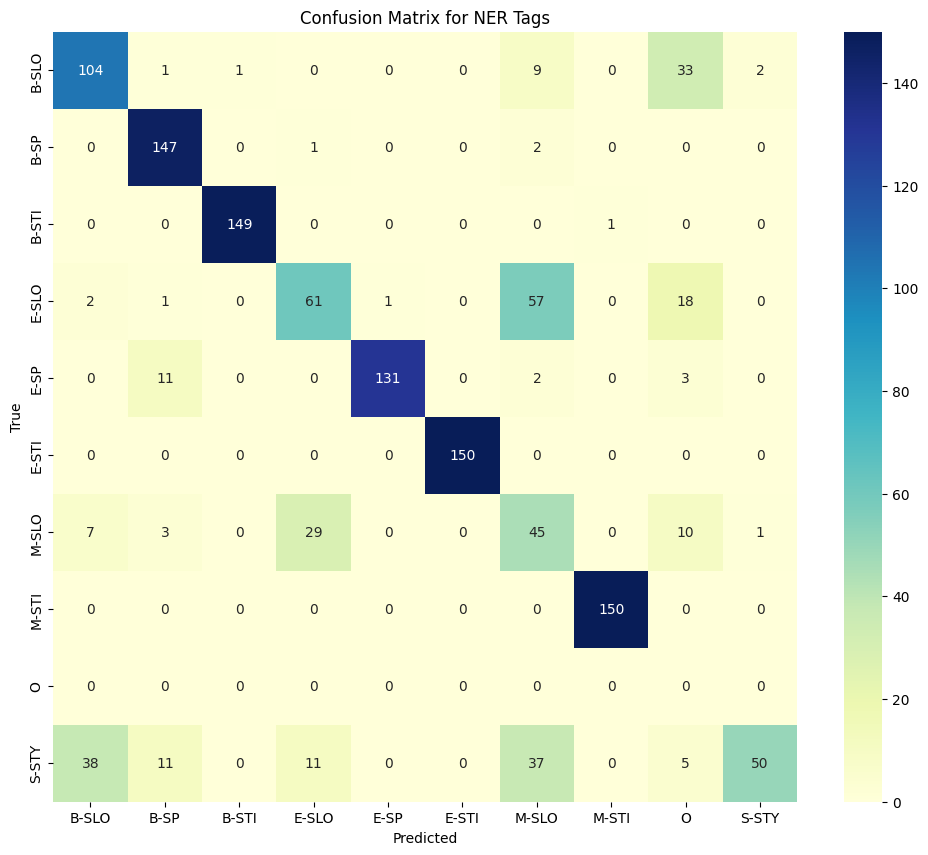

In [ ]:
# Step 3: Compute confusion matrix
labels = sorted(list(set(y_true_flat + y_pred_flat)))
cm = confusion_matrix(y_true_flat, y_pred_flat, labels=labels)

# Step 4: Plot confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap="YlGnBu")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for NER Tags")
plt.show()

In [ ]:
# Print overall metrics
print("Accuracy:", accuracy_score(y_true_flat, y_pred_flat))

Accuracy: 0.7686915887850467


In [ ]:
print("Precision (macro):", precision_score(y_true_flat, y_pred_flat, average='macro'))
print("Recall (macro):", recall_score(y_true_flat, y_pred_flat, average='macro'))
print("F1 Score (macro):", f1_score(y_true_flat, y_pred_flat, average='macro'))

Precision (macro): 0.7350192440942802
Recall (macro): 0.6796168993913355
F1 Score (macro): 0.6883826061384543


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
print("Precision (micro):", precision_score(y_true_flat, y_pred_flat, average='micro'))
print("Recall (micro):", recall_score(y_true_flat, y_pred_flat, average='micro'))
print("F1 Score (micro):", f1_score(y_true_flat, y_pred_flat, average='micro'))

Precision (micro): 0.7686915887850467
Recall (micro): 0.7686915887850467
F1 Score (micro): 0.7686915887850467
